In [106]:
# Imports 
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

# DUDC : discrete unit disc cover
## I) - DUDC dans $\mathbb{R} (d=1) $ 
### Question 01 : Algorithme glouton qui résout le DUDC:
#### Classes utilisées 

In [107]:
# Discrete Unit Disk Problem (DUDC)
# Used functions
def norm2(a,b):
    return (a.x-b.x)**2 + (a.y-b.y)**2

# Used Classes !
class Point:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y=y

    def __repr__(self):
        return f'({self.x},{self.y})'

    def __lt__(self, other):
        return (self.x < other.x) or (self.x == other.x and self.y < other.y)

class Circle:
    def __init__(self,x,y,r=1):
        self.x=x
        self.y=y
        self.r=r

    def __repr__(self):
        return f'({self.x},{self.y})'

    def __lt__(self, other):
        return (self.x < other.x) or (self.x == other.x and self.y < other.y)

    def covers(self,point):
        return norm2(point,self) <= 1



## Classe DUDC qu'on va s'en servir pour la représentation graphique :

In [108]:
class DUDC:
    def __init__(self):
        self.P = set() # set of points
        self.Q = set() # set of unit circles
        self.num_P =self.num_Q= 0
        self.d = 1  # We are in |R

    def __repr__(self):
        return f'({self.P},{self.Q})'

    def figure(self,solution=[],original=True):
        plt.clf()
        plt.axis("equal")
        for p in self.P:
            plt.scatter(p.x,p.y,marker='o',c='k',zorder=2)
        for q in self.Q:
            color= 'red' if original or q not in solution else 'green'
            plt.scatter(q.x, q.y,marker = 's',c=color, zorder = 1,s=10)
            circle = plt.Circle((q.x, q.y), 1,color = color, alpha = 0.1, zorder = 0)
            plt.gcf().gca().add_artist(circle)

        plt.xlabel('Abscisses X')
        plt.ylabel('Ordonnées Y')
        plt.title('DUDC Problem graph')
        return plt

    def parse_file(self,path):
        with open(path,'r') as f:
            d=list(csv.reader(f,delimiter=';'))    
            points=d[0]
            print(points)
            circles=d[1]
            print(circles)

            for p in points:
                x,y=tuple(map(float,p.split(',')))
                point=Point(x,y)
                if y != float(0) : self.d=2
                self.P.add(point)
                self.num_P+=1
            for c in circles:
                x,y=tuple(map(float,c.split(',')))
                circle=Circle(x,y)
                if y != float(0) : self.d=2
                self.Q.add(circle)
                self.num_Q+=1


# Algorithme Glouton (Greedy aproach) DUDC 1D

In [109]:
def dudc_1d(P,Q):
    points=sorted(list(P))
    circles=sorted(list(Q))
    Q_star=set()
    cpt_circle=0
    while len(points):
        p_left=points[0]
        # Le premier cercle qui couvre ce point
        while cpt_circle < len(circles):
            circle=circles[cpt_circle]
            if circle.covers(p_left):
                break
            cpt_circle+=1

        if cpt_circle >= len(circles):
            print(' This DUDC problem hasn t any solution ')
            Q_star.clear()
            break

        # Le plus a droite cercle couvrant ce point
        while cpt_circle < len(circles) - 1 and circles[cpt_circle + 1].covers(p_left):
             cpt_circle += 1
             circle_taken = circles[cpt_circle]
        Q_star.add(circle_taken)
        for p in points:
            if circle_taken.covers(p):
                points.remove(p)
    return Q_star




# Test de l'algo DUDC

['4,0', '4.5,0', '5,0', '6.3,0', '8,0']
['3,0', '4.6,0', '5.6,0', '7.2,0', '9,0']


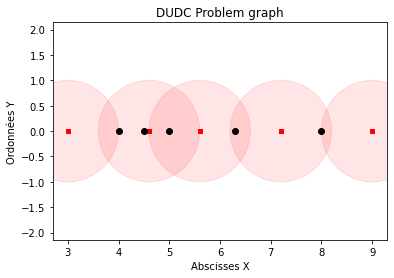

 Voila la solution :


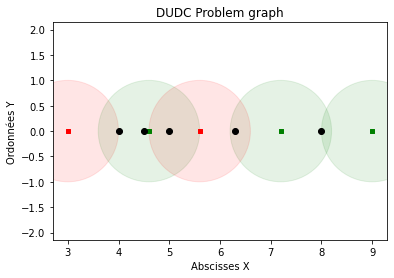

In [110]:
in_path='DUDC_examples'
out_path= 'DUDC_out'
files= os.listdir(in_path)

for file in files:
    dudc=DUDC()
    dudc.parse_file(f'{in_path}/{file}')
    if dudc.d == 1:
        fig=dudc.figure()
        title=f'{file[:-4]}_origin.png'
        fig.savefig(f'{out_path}/{title}')
        fig.show()
        Q_star=dudc_1d(dudc.P,dudc.Q)
        
        if len(Q_star):
            print(' Voila la solution :')
            res=dudc.figure(Q_star,False)
            title_after=f'{file[:-4]}_sol.png'
            res.savefig(f'{out_path}/{title_after}')
            res.show()
    else:
        print(' Votre problem est en 2D (R²)')


